#Tensorflow - DNN & CNN

#Sklearn Metrics

It has the follwing diversity of metrics
*   Classification
*   Regression
*   Clustering
*   Multilabel
*   Model Selection
*   Biclustering
*   Distance
*   Pair wise








#Minist Dataset
In the context of the MNIST dataset for deep learning, the dimensions (28, 28) represent the pixel dimensions of each grayscale image.

Each image in the MNIST dataset is a 28x28 pixel image, where each pixel has an intensity value representing the darkness or lightness of that pixel.

Therefore, for each image in the MNIST dataset, you have a 2D array or matrix of pixel values with a shape of (28, 28). The values in this matrix range from 0 to 255, where 0 represents a black pixel and 255 represents a white pixel. The pixel values between 0 and 255 represent various shades of gray.

The entire MNIST training set consists of 60,000 such images, each with dimensions (28, 28), forming a 3D array with a shape of (60000, 28, 28). In this 3D array, each element along the first axis (dimension) corresponds to an individual image.

#(x_train, y_train), (x_test, y_test) = mnist.load_data()

The first tuple (x_train, y_train) contains the training data:

x_train: a 3D NumPy array representing the training images. It has a shape of (number of samples, height, width).
y_train: a 1D NumPy array representing the labels for the training images.
The second tuple (x_test, y_test) contains the testing data:

x_test: a 3D NumPy array representing the testing images. It has a shape of (number of samples, height, width).
y_test: a 1D NumPy array representing the labels for the testing images.

#stratify=y_train

Ensures that class distribution is preserved in both train and test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Extract a subset of training samples (for faster training)
subset_size = 5000

# Usaully the syntax of test_train_split is X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=subset_size,test_size=subset_size, random_state=42)
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=subset_size,stratify=y_train, random_state=42)
# Print the shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

x_train shape: (5000, 28, 28)
y_train shape: (5000,)


# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Extract a subset of training samples (for faster training)
subset_size = 5000

# Usaully the syntax of test_train_split is X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=subset_size,test_size=subset_size, random_state=42)

# Normalize pixel values to be between 0 and 1
# The pixel values ranges between 0 to 255 where 0 is indicating black and 255 indicates whites , hence we are dividing by 255 here
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


##Addition or extension of channel

So, the addition of the channel dimension serves two purposes:

Formality of CNNs: Convolutional layers in CNNs are designed to operate on multi-channel data. The channel dimension is a formal requirement of the architecture.

Consistency and Compatibility: By representing grayscale images as having one channel, you make your data consistent with the expectations of CNN layers. This ensures that the same network architecture can seamlessly handle both grayscale and color images without modification.

In [ ]:
# Add a channel dimension to the images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

 ## model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))

 indicates that the first convolutional layer will learn 32 filters, each of size 3x3, with ReLU activation, and the input images are expected to be 28x28 pixels with 1 channel (grayscale). This is a common configuration for the initial convolutional layers in many CNN architectures. The choice of 32 filters is somewhat arbitrary and can be adjusted based on the complexity of the problem and the desired capacity of the network.

 In summary, the model starts with a convolutional layer that learns 32 filters, followed by max-pooling. Then, there's another convolutional layer that learns 64 filters, followed by another max-pooling layer. These convolutional and max-pooling layers are common components of Convolutional Neural Networks (CNNs) used for image classification. They help the network learn hierarchical features from the input images while reducing spatial dimensions.

<b> why 32 then 64 ? <br>model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))<br>
model.add(layers.MaxPooling2D((2, 2)))<br>
model.add(layers.Conv2D(64, (3, 3), activation='relu')) </b><br>

starts with 32 filters. This is a common choice to capture lower-level features in the input images. It's often a good practice to start with a smaller number of filters and gradually increase the complexity.

<b> Why  10 (Dense(10, activation='softmax')) </b><br>
 The last dense layer (Dense(10, activation='softmax')) has 10 units, corresponding to the 10 classes in the MNIST dataset (digits 0 through 9)

<b> why extra brackets in MaxPooling2D() <br>model.add(layers.MaxPooling2D((2, 2)))</b>
A tuple is required as a parameter

In [ ]:

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


##<b>Adam</b><br>
adapts the learning rate during training. It combines the advantages of two other popular optimization methods: AdaGrad and RMSProp.

<b>Sparse_categorical_crossentropy</b><br>
How well the model is performing
This loss function is suitable for multi-class classification problems where the labels are integers (e.g., 0, 1, 2, ...). If the labels were one-hot encoded, you might use 'categorical_crossentropy' instead.

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



##<b>Epochs</b><br>
The epochs parameter specifies the number of times the model will iterate over the entire training dataset during the training process.

<b>validation_split=0.2</b><br>
 20% of the training data is reserved for validation, and the remaining 80% is used for training.

In [ ]:

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)



Epoch 1/5
125/125 [==============================] - 9s 60ms/step - loss: 0.7722 - accuracy: 0.7567 - val_loss: 0.2551 - val_accuracy: 0.9250
Epoch 2/5
125/125 [==============================] - 8s 61ms/step - loss: 0.1995 - accuracy: 0.9413 - val_loss: 0.1833 - val_accuracy: 0.9550
Epoch 3/5
125/125 [==============================] - 4s 31ms/step - loss: 0.1056 - accuracy: 0.9703 - val_loss: 0.1471 - val_accuracy: 0.9610
Epoch 4/5
125/125 [==============================] - 4s 31ms/step - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.1379 - val_accuracy: 0.9620
Epoch 5/5
125/125 [==============================] - 5s 40ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.1171 - val_accuracy: 0.9660


##<b>train_pred = np.argmax(model.predict(x_train), axis=1) </b> <br>
is an array containing the predicted class labels for each sample in the training dataset. The argmax operation is used to find the class with the highest predicted probability for each input. This is often done when working with categorical data and multi-class classification problems.

<b>why axis=1? </b> <br>
Along axis=0, you have <b>different samples</b>.<br>
Along axis=1, you have the <b>predicted probabilities for each class</b>.<br>
So when you use np.argmax(..., axis=1), you are asking NumPy to find the index of the maximum value along the columns (axis 1), effectively telling it to find the predicted class for each sample. If you used axis=0, it would find the index of the maximum value along the rows, which would not make sense in the context of class predictions.

In [ ]:
# Evaluate on training set

train_pred = np.argmax(model.predict(x_train), axis=1)
print(train_pred.shape)

train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training Set Accuracy: {train_accuracy * 100:.2f}%')


# Evaluate on testing set
test_pred = np.argmax(model.predict(x_test), axis=1)
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Testing Set Accuracy: {test_accuracy * 100:.2f}%')

157/157 [==============================] - 3s 17ms/step
(5000,)


In [ ]:
# import tensorflow as tf
# (x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(10,3, activation = "relu"))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(10, activation = "Softmax"))

# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = "Adam")



# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [ ]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# (, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("train_images",train_images.shape)
print("train_labels:",train_labels.shape)
print("test_images:",test_images.shape)
print("test_labels",test_labels.shape)

train_images (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels (10000,)


In [ ]:
import random as rnd

t_x = []
t_y = []
sz = len(train_images) #60000
# print(sz)
for i in range(20):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while train_labels[idx] != c:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]

# print(len(t_x)) #200
# print(len(t_y)) #200
t_x = np.array(t_x, dtype=np.float32)/255.0

# print(t_x.shape) #200
# print(t_y.shape) #200,784
print(t_y)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Load the MNIST fashion dataset
from keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to 28x28 pixels
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))
# print(input_img)
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict the output
decoded_imgs = autoencoder.predict(x_test)

# Display the results
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

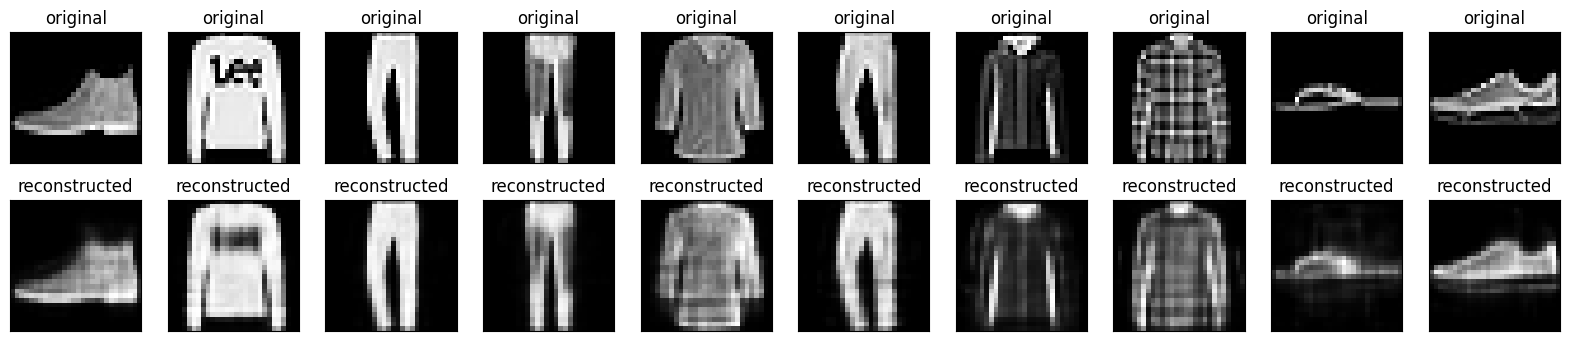

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs)

313/313 [==============================] - 2s 6ms/step
[[[5.24495874e-07 6.18880620e-07 8.95446476e-07 ... 1.45121667e-05
   2.76217918e-07 4.07296085e-07]
  [6.73154489e-07 1.13998101e-06 7.27819224e-06 ... 1.05237763e-03
   1.48353248e-03 4.01487000e-07]
  [1.98883731e-06 8.70155759e-07 4.82004509e-07 ... 1.35811011e-03
   3.01683904e-03 1.13864107e-05]
  ...
  [6.36562036e-05 3.08748713e-05 3.17375961e-05 ... 1.00635982e-03
   1.04867306e-03 4.39610507e-04]
  [4.12377922e-05 5.64400470e-05 7.99875634e-05 ... 3.92698654e-04
   3.35006014e-04 2.21234062e-04]
  [1.11506336e-06 1.56915539e-05 2.63075926e-05 ... 6.13564043e-04
   2.77795683e-04 3.28899550e-05]]

 [[4.29237312e-09 1.77307780e-09 1.17007737e-08 ... 7.85829616e-06
   4.05694411e-09 1.16824213e-08]
  [8.27184099e-09 1.00275397e-08 2.94663023e-05 ... 1.06688286e-03
   9.44921630e-05 2.47489917e-09]
  [2.78241430e-08 1.25374186e-07 1.17548088e-05 ... 3.42523563e-03
   1.18536220e-04 9.47104070e-07]
  ...
  [4.77034810e-05 9.07

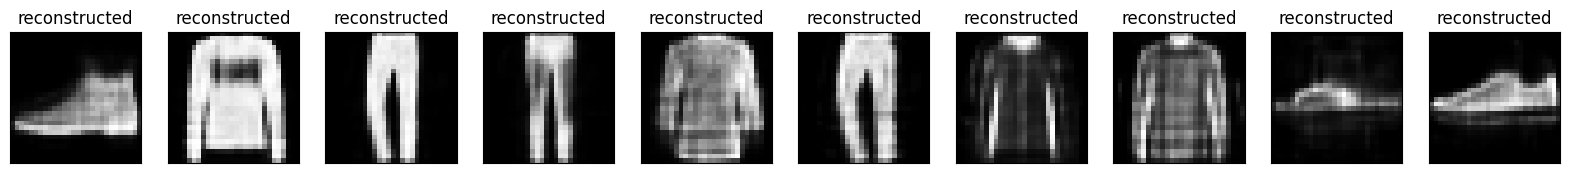

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  # plt.imshow(x_test[i])
  # plt.title("original")
  # plt.gray()
  # ax.get_xaxis().set_visible(False)
  # ax.get_yaxis().set_visible(False)

  # display reconstruction
  # ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 1570      
                                                                 
Total params: 1570 (6.13 KB)
Trainable params: 1570 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [ ]:
#code provided by sir
import tensorflow as tf
def create_encoder ():
  model = tf. keras. models. Sequential ()
  model. add (tf. keras. layers.Dense(2, activation='relu', input_dim=784) )  #Hidden layer with 2 neurons,
  return model
def create_decoder ():
  model = tf. keras.models.Sequential()
  model. add (tf.keras. layers.Dense(784, activation='relu', input_dim=2)) #output layer with 784 neurons
  return model
encoder = create_encoder ()
decoder = create_decoder ()
inp = tf.keras. layers. Input (shape=(784, ))
latent_features = encoder(inp)
outputs = decoder (latent_features)
encoder .summary()
model = tf.keras.models.Model (inputs=inp, outputs=outputs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
Total params: 1570 (6.13 KB)
Trainable params: 1570 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Generate random data for testing (replace this with your actual data)
num_samples = 1000
random_data = np.random.rand(num_samples, 784)

# Get the response of the hidden neurons for the random data
hidden_responses = encoder.predict(random_data) #Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.

# Plot the response in a scatter plot
plt.scatter(hidden_responses[:, 0], hidden_responses[:, 1], alpha=0.5)
plt.title('Scatter Plot of Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.colorbar(label='Digit Category')
plt.show()

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.8717 - val_loss: 0.8922
Epoch 2/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8659 - val_loss: 0.8898
Epoch 3/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8637 - val_loss: 0.8879
Epoch 4/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.8620 - val_loss: 0.8867
Epoch 5/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.8611 - val_loss: 0.8859
Epoch 6/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8605 - val_loss: 0.8853
Epoch 7/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8599 - val_loss: 0.8851
Epoch 8/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8595 - val_loss: 0.8846
Epoch 9/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.8592 - val_loss: 0.8844
Epoch 10/10
1750/1750 [==============================] - 3s 1ms/step


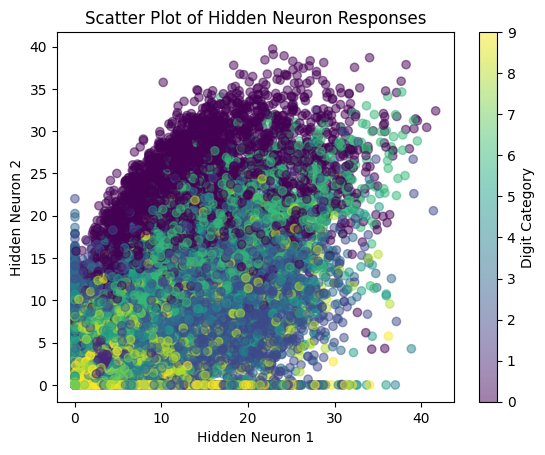

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST data (you can replace this with your labeled data)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create encoder
def create_encoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(2, activation='relu', input_dim=784))
    return model

# Create decoder
def create_decoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, activation='relu', input_dim=2))
    return model

# Create encoder and decoder
encoder = create_encoder()
decoder = create_decoder()

# Define the input layer
inp = tf.keras.layers.Input(shape=(784,))

# Connect the layers
latent_features = encoder(inp)
outputs = decoder(latent_features)

# Create the autoencoder model
model = tf.keras.models.Model(inputs=inp, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the scaled training data
model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2)

# Get the response of the hidden neurons for the scaled training data
hidden_responses = encoder.predict(X_train_scaled)

# Plot the response in a scatter plot with different colors for each category
plt.scatter(hidden_responses[:, 0], hidden_responses[:, 1], c=y_train.astype(int), cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.colorbar(label='Digit Category')
plt.show()



## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST data (you can replace this with your labeled data)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create encoder
def create_encoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))
    model.add(tf.keras.layers.Dense(2, activation='relu', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))
    return model

# Create decoder
def create_decoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, activation='relu', input_dim=2))
    return model

# Create encoder and decoder
encoder = create_encoder()
decoder = create_decoder()

# Define the input layer
inp = tf.keras.layers.Input(shape=(784,))

# Connect the layers
latent_features = encoder(inp)
outputs = decoder(latent_features)

# Create the autoencoder model
model = tf.keras.models.Model(inputs=inp, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the scaled training data
model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2)

# Get the response of the hidden neurons for the scaled training data
hidden_responses = encoder.predict(X_train_scaled)

# Plot the response in a scatter plot with different colors for each category
plt.scatter(hidden_responses[:, 0], hidden_responses[:, 1], c=y_train.astype(int), cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.colorbar(label='Digit Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST data (you can replace this with your labeled data)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create encoder
def create_encoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    return model

# Create decoder
def create_decoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=2))
    model.add(tf.keras.layers.Dense(784, activation='relu'))
    return model

# Create encoder and decoder
encoder = create_encoder()
decoder = create_decoder()

# Define the input layer
inp = tf.keras.layers.Input(shape=(784,))

# Connect the layers
latent_features = encoder(inp)
outputs = decoder(latent_features)

# Create the autoencoder model
model = tf.keras.models.Model(inputs=inp, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the scaled training data
model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2)

# Get the response of the hidden neurons for the scaled training data
hidden_responses = encoder.predict(X_train_scaled)

# Plot the response in a scatter plot with different colors for each category
plt.scatter(hidden_responses[:, 0], hidden_responses[:, 1], c=y_train.astype(int), cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.colorbar(label='Digit Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST data (you can replace this with your labeled data)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create encoder
def create_encoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    return model

# Create decoder
def create_decoder():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=2))
    model.add(tf.keras.layers.Dense(784, activation='relu'))
    return model

# Create encoder and decoder
encoder = create_encoder()
decoder = create_decoder()

# Define the input layer
inp = tf.keras.layers.Input(shape=(784,))

# Connect the layers
latent_features = encoder(inp)
outputs = decoder(latent_features)

# Create the autoencoder model
model = tf.keras.models.Model(inputs=inp, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on the scaled training data
model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2)

# Get the response of the hidden neurons for the scaled training data
hidden_responses = encoder.predict(X_train_scaled)

# Plot the response in a scatter plot with different colors for each category
plt.scatter(hidden_responses[:, 0], hidden_responses[:, 1], c=y_train.astype(int), cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.colorbar(label='Digit Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: ignored

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [ ]:
Write your code here


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
Write your code here